In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import sys

In [5]:
def loadData(action, subject, instance):
    ins = np.loadtxt('/content/drive/My Drive/MSRAction3DSkeletonReal3D/a%02i_s%02i_e%02i_skeleton3D.txt'%(action, subject, instance))
    ins = ins.reshape((ins.shape[0]//20, 20, 4))
    return ins

In [6]:
action = 18
subject = 1
instance = 1

data = loadData(action, subject, instance)
print(data.shape)

(43, 20, 4)


In [7]:
datam=np.delete(data, [3,3], 2)

In [8]:
x_data=datam.reshape(43,60)

In [9]:
x_train = np.delete(x_data, 42,0)
y_train = np.delete(x_data, 0,0)

In [10]:
from keras import backend as K
def euc_dist(y_true, y_pred):
    #print(y_true, y_pred)
    return K.sqrt(K.sum(K.square(y_true - y_pred), axis=-1, keepdims=True))

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(256,
               batch_input_shape=(1,10,60),     
               return_sequences=True))

model.add(Dense(60))

model.compile(loss=euc_dist, optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10, 256)              324608    
_________________________________________________________________
dense (Dense)                (1, 10, 60)               15420     
Total params: 340,028
Trainable params: 340,028
Non-trainable params: 0
_________________________________________________________________


In [12]:
x_train.resize(1,42,60)
y_train.resize(1,42,60)

In [13]:
model.fit(x_train,
          y_train,
          epochs=3500,
          shuffle=False)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Epoch 1001/3500
1/1 [==============================] - 0s 56ms/step - loss: 0.3468
Epoch 1002/3500
1/1 [==============================] - 0s 67ms/step - loss: 0.2637
Epoch 1003/3500
1/1 [==============================] - 0s 59ms/step - loss: 0.3547
Epoch 1004/3500
1/1 [==============================] - 0s 67ms/step - loss: 0.2585
Epoch 1005/3500
1/1 [==============================] - 0s 51ms/step - loss: 0.3455
Epoch 1006/3500
1/1 [==============================] - 0s 57ms/step - loss: 0.2666
Epoch 1007/3500
1/1 [==============================] - 0s 60ms/step - loss: 0.3381
Epoch 1008/3500
1/1 [==============================] - 0s 66ms/step - loss: 0.2688
Epoch 1009/3500
1/1 [==============================] - 0s 56ms/step - loss: 0.3364
Epoch 1010/3500
1/1 [==============================] - 0s 60ms/step - loss: 0.2802
Epoch 1011/3500
1/1 [==============================] - 0s 54ms/step - loss: 0.3268
Epoch 1012/3500
1/1 [===================

In [14]:
predicted_output = x_train[0][0];
predicted_output.resize(1,1,60)
newdata = np.empty((42, 20, 3), dtype=np.float32)


for j in range(0,len(x_train)) :
    
    for i in range(1,len(x_train[j])) :
        
        if i%1 == 0 :
            predicted_output = x_train[j][i];
            predicted_output.resize(1,1,60)
        
        predicted_output = model.predict(predicted_output);
        frame = predicted_output[0][0]
        frame.resize(20,3)
        newdata[i]=frame


In [15]:
def animate2(i):
    graph._offsets3d = (newdata[i,:,0], newdata[i,:,2], newdata[i,:,1])
    return graph

In [ ]:
newdata

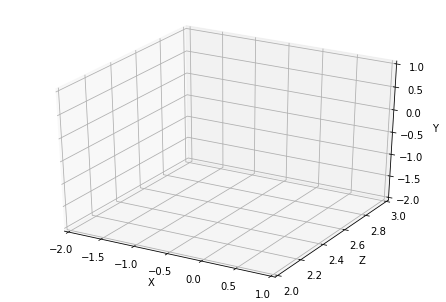

In [22]:
fig = plt.figure()
ax = p3.Axes3D(fig)

ax.set_xlim3d([-2.0, 1.0])
ax.set_xlabel('X')

ax.set_zlim3d([-2.0, 1.0])
ax.set_zlabel('Y')

ax.set_ylim3d([2.0, 3.0])
ax.set_ylabel('Z')

graph = ax.scatter([], [], [])


anim = FuncAnimation(fig, animate2, frames=newdata.shape[0], interval=100)
plt.show()

In [24]:
anim.save('animation.mp4')



1.   First of all I uploaded the dataset from my google drive account.
2.   I chose a specific action from the dataset to work on.
3.   As mentioned in the dataset document, there are four real numbers stored in each joint so I deleted the confidence score which I don't need.
4.  I reshape the data to get it into the character frame of action (size 60=20*3)
5.  I prepared train and test data. I changed the train data to include the characters from 0 to n-1 and created the test data as characters from 1 to n.
6.  I crated a LSTM model and for the loss function I used Euclidean distance.
7.  I trained my model with model.fit for 3500 epoch
8.  After I trained my network I used model.predict function to predict every next frame
9.  I plotted the results and created the video

Youtube Linki: https://youtu.be/N-l6FQKBKqs
